In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# АНАЛИз

[Text(0.5, 1.0, 'Скока с приступом?'),
 Text(0.5, 0, 'Персонаж выжил?'),
 Text(0, 0.5, 'Количество')]

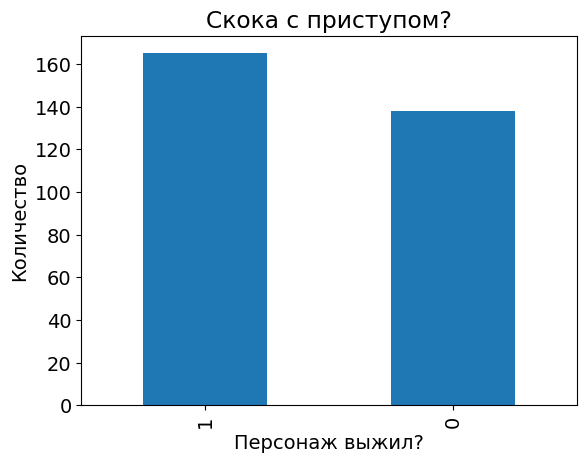

In [27]:
df['output'].value_counts().plot(kind='bar').set(title='Скока с приступом?', xlabel='Персонаж выжил?', ylabel='Количество')

[Text(0.5, 1.0, 'Мужики и бабы?'),
 Text(0.5, 0, 'МУЖИК?'),
 Text(0, 0.5, 'Количество')]

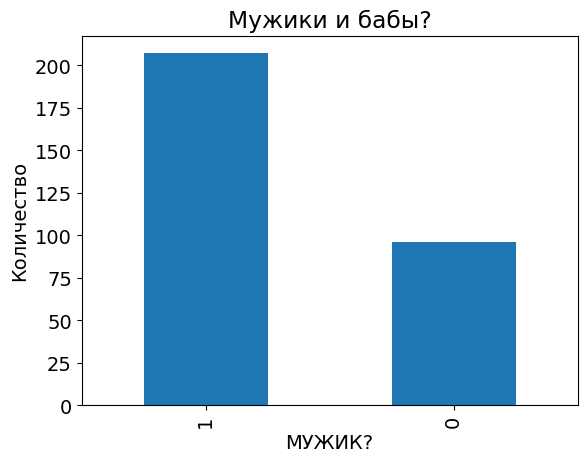

In [6]:
df['sex'].value_counts().plot(kind='bar').set(title='Мужики и бабы?', xlabel='МУЖИК?', ylabel='Количество')

[Text(0.5, 1.0, 'Скока с приступом?'),
 Text(0.5, 0, 'Персонаж выжил?'),
 Text(0, 0.5, 'Количество')]

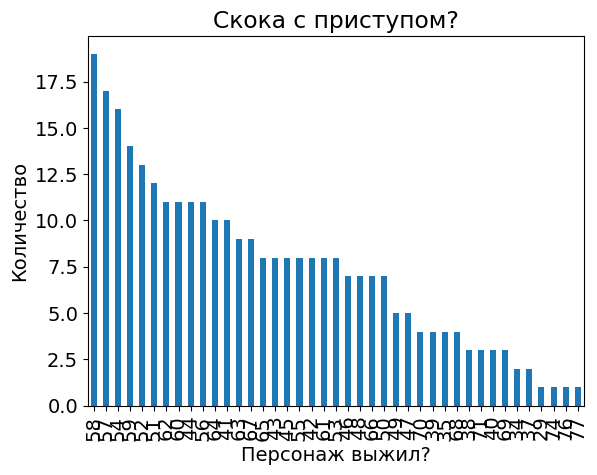

In [16]:
df['age'].value_counts().plot(kind='bar').set(title='Скока с приступом?', xlabel='Персонаж выжил?', ylabel='Количество')

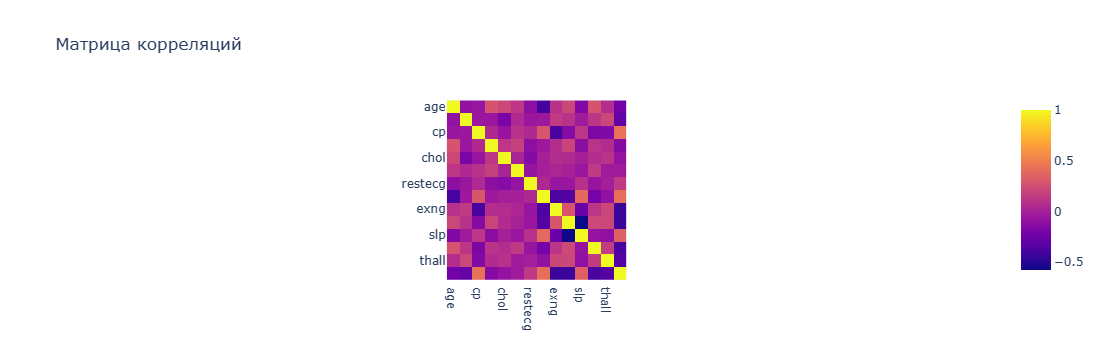

In [41]:
px.imshow(df.corr(),title="Матрица корреляций")

In [12]:
# ПРОВЕРКА ЗНАЧИМОСТИ ПЕРЕМЕННЫХ

In [9]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.stats.tests.test_influence

In [15]:
model_1 = sm.GLM(
    df["output"],
    df["age"],
    family=families.Binomial(),
).fit()
print(model_1.summary())

model_2 = sm.GLM(
    df["output"],
    df[["age", "sex"]],
    family=families.Binomial(),
).fit()
print(model_2.summary())
 
model_3 = sm.GLM(
    df["output"],
    df[["age", "sex", "cp"]],
    family=families.Binomial(),
).fit()
print(model_3.summary())
 
model_4 = sm.GLM(
    df["output"],
    df[["age", "sex", "cp", "trtbps"]],
    family=families.Binomial(),
).fit()
print(model_4.summary())

model_5 = sm.GLM(
    df["output"],
    df[["age", "sex", "cp", "trtbps", "chol"]],
    family=families.Binomial(),
).fit()
print(model_5.summary())

model_6 = sm.GLM(
    df["output"],
    df[["age", "sex", "cp", "trtbps", "chol", "fbs"]],
    family=families.Binomial(),
).fit()
print(model_6.summary())
 
model_7 = sm.GLM(
    df["output"],
    df[["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg"]],
    family=families.Binomial(),
).fit()
print(model_7.summary())
 
model_8 = sm.GLM(
    df["output"],
    df[["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh"]],
    family=families.Binomial(),
).fit()
print(model_8.summary())

model_9 = sm.GLM(
    df["output"],
    df[["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng"]],
    family=families.Binomial(),
).fit()
print(model_9.summary())

model_10 = sm.GLM(
    df["output"],
    df[["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "oldpeak"]],
    family=families.Binomial(),
).fit()
print(model_10.summary())
 
model_11 = sm.GLM(
    df["output"],
    df[["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "oldpeak", "slp"]],
    family=families.Binomial(),
).fit()
print(model_11.summary())
 
model_12 = sm.GLM(
    df["output"],
    df[["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "oldpeak", "slp", "caa"]],
    family=families.Binomial(),
).fit()
print(model_12.summary())

model_13 = sm.GLM(
    df["output"],
    df[["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "oldpeak", "slp", "caa", "thall"]],
    family=families.Binomial(),
).fit()
print(model_13.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 output   No. Observations:                  303
Model:                            GLM   Df Residuals:                      302
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -209.63
Date:                Fri, 29 Sep 2023   Deviance:                       419.26
Time:                        00:26:36   Pearson chi2:                     303.
No. Iterations:                     4   Pseudo R-squ. (CS):          -0.005367
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0019      0.002      0.887      0.3

In [ ]:
# ПОПЫТКА В ПЕРВУЮ МОДЕЛЬ

In [4]:
X = df.drop('output', axis=1)
y = df['output']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
logreg = LogisticRegression(solver='lbfgs', max_iter=800)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=800)

In [ ]:
# ОЦЕНКА МЕТРИК ЕБАНА РОТ

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [23]:
y_pred = logreg.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=["ИНФАРКТ", "НЕ ИНФАРКТ"]))

accuracy 0.8947368421052632
              precision    recall  f1-score   support

     ИНФАРКТ       0.91      0.86      0.88        35
  НЕ ИНФАРКТ       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



In [ ]:
# ВЫГРУЗКА ЕБЕЕЕЕЙШЕЕЕЕЙ МОДЕЛИ В ТАК СКАЗАТЬ БИНАРНЫЕ ПРЕДСТАВЛЕНИЯ ЭВМ

In [25]:
import pickle

filename = 'models/model.pk'
with open(filename, 'wb') as file:
    pickle.dump(logreg, file)